<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/Project_final/Tranditional_costume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo thư viện cần thiết
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
from numpy.lib.npyio import load
import numpy as np
from skimage.color import rgb2gray
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# #Load data từ drive lên 
# folder='/content/drive/MyDrive/Colab Notebooks/Project_final_Traditional_costume/Image/'
# #Tạo 2 danh sách trống để chứa ảnh và nhãn cần xử lí 
# photos,labels = list(),list()
# for file in listdir(folder):
#   if file.startswith('ao_dai'):
#     output = 0.0     
#   if file.startswith('Ao_tu_than'):
#     output = 1.0    
#   if file.startswith('ao_ba_ba'):
#     output = 2.0       
#   photo = load_img(folder+file, target_size= (128,128))
#   for angle in range(20,81,10):
#     for ds in range(80,121,5):
#       for shift in range(-20,21,4):
#         for zoom in  range(-40,41,8):
#           datagen = ImageDataGenerator(
#               rotation_range= angle,  # Góc xoay
#               horizontal_flip=True,  # Lật theo chiều ngang
#               zoom_range=zoom/100,  # Tỷ lệ zoom
#               width_shift_range=shift/100,  # Dịch chuyển theo chiều ngang
#               height_shift_range=shift/100,  # Dịch chuyển theo chiều dọc
#               brightness_range=[ds/100,ds/100]  # Độ sáng
#           )
#           # Thay đổi kích thước ảnh thành (1, height, width, channels)
#           photo_np = np.expand_dims(photo, axis=0)
#           # Tạo batch dữ liệu biến đổi từ ảnh gốc
#           batch = datagen.flow(photo_np, batch_size=1)
#           for i in range(6):
#               augmented_image = next(batch)[0].astype('uint8')
#               photos.append(augmented_image)
#               labels.append(output)
#   # photo = rgb2gray(photo)
#   photo = img_to_array(photo)
#   photos.append(photo)
#   labels.append(output)
# photos= asarray(photos)
# labels = asarray(labels)
# # Lưu file hình và file nhãn vào drive để sau này xử lí  
# save('/content/drive/MyDrive/Colab Notebooks/Project_final_Traditional_costume/T_custome_photo.npy',photos)
# save('/content/drive/MyDrive/Colab Notebooks/Project_final_Traditional_costume/T_custome_label.npy',labels)


In [ ]:
#Tải ảnh và nhãn đã lưu lên để xử lí
photo = np.load('/content/drive/MyDrive/Colab Notebooks/Trandition_costume/T_custome_photo2.npy')
label = np.load('/content/drive/MyDrive/Colab Notebooks/Trandition_costume/T_custome_label2.npy')

In [ ]:
#Chia dữ liệu thành 2 phần train và test để kiểm tra mô hình
split_sample = int(0.2*len(photo))   # phần train : 80% , test: 20%
(x_train,y_train) = photo[split_sample:],label[split_sample:]
(x_test,y_test)= photo[:split_sample],label[:split_sample]


In [ ]:
#Kiểm tra kích thước của tập train
x_train.shape

(9620, 64, 64, 3)

In [ ]:
#Kiểm tra kích thước của tập test
x_test.shape

(2405, 64, 64, 3)

In [ ]:
#Đưa ảnh về độ phân giải (64x64) để đảm bảo độ chính xác 
# và giảm thiểu thời gian tính toán
x_train = x_train.reshape(9620,64,64,3)
x_test = x_test.reshape(2405,64,64,3)
#Chia 255 để chuẩn hóa dữ liệu về khoảng 0 đến 1 giúp 
# mô hình học được nhanh và hiệu quả hơn 
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
# chuyển đổi các nhãn lớp của dữ liệu huấn luyện và 
# kiểm tra thành các vectơ one-hot encoding.
from keras.utils import to_categorical
y_train = to_categorical(y_train,3)
y_test  = to_categorical(y_test,3)

In [ ]:
# Khai báo các thư viện cần thiết để xây dựng mô hình CNN
from keras.models import Sequential , Model
from keras.layers import Dense , Flatten, Dropout, Conv2D, MaxPooling2D ,Normalization,Input
from keras.optimizers import Adam 

In [ ]:
# Định nghĩa các biến 
batch_size = 50  # số lượng học
epochs =  30    #số lần học
classes = 3    # Số lớp

In [ ]:
model=Sequential()    # Khởi tạo đối tượng để xây dựng mô hình CNN 
# Dùng mô hình CNN với 3 lớp tích chập để huấn luyện cho tập dữ liệu tiền giấy 
model.add(Conv2D(64,kernel_size=(3,3),activation ='linear',input_shape= (64,64,3),padding= 'same'))   
# 64:số lần tích chập, (3,3): kích thước bộ lọc , hàm kích hoạt là hàm tuyến tính 
# với đầu vào ảnh là 64x64 pixel và 3 kênh màu
from keras.layers import LeakyReLU
# Sử dụng hàm kích hoạt LeakyReLU cho đầu ra của lớp Conv2D.
model.add(LeakyReLU(alpha= 0.1))
#Lọc giá trị lớn hơn với kích thước 2x2 
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64,(3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128,(3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

from keras.backend import categorical_crossentropy
from keras.losses import categorical_crossentropy
model.add(Flatten())  #chuyển đổi đầu ra của các lớp tích chập 
                      #và lớp pooling thành một vector 1D 

model.add(Dense(2048,activation='linear'))   #Đi qua 2048 lớp
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1042,activation='linear'))   #Đi qua 1024 lớp
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128,activation='linear'))   #Đi qua 128 lớp
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                 

In [ ]:
photo = 0

In [ ]:
from keras.models import load_model
# Tải mô hình từ file đã lưu
model = load_model('/content/drive/MyDrive/Colab Notebooks/Trandition_costume/T_costume.h5')

In [ ]:
model.compile(loss= categorical_crossentropy,optimizer= Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size= batch_size,epochs=epochs,verbose =1)      
# verbose=1,Hiển thị giá trị train, chỉ xuất hiện 1 lần rồi biến mất

Epoch 1/20
193/193 [==============================] - 4s 17ms/step - loss: 0.0418 - accuracy: 0.9956
Epoch 2/20
193/193 [==============================] - 3s 18ms/step - loss: 0.0236 - accuracy: 0.9971
Epoch 3/20
193/193 [==============================] - 3s 17ms/step - loss: 0.0054 - accuracy: 0.9988
Epoch 4/20
193/193 [==============================] - 3s 17ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 5/20
193/193 [==============================] - 3s 17ms/step - loss: 2.5335e-04 - accuracy: 0.9999
Epoch 6/20
193/193 [==============================] - 3s 18ms/step - loss: 3.9487e-06 - accuracy: 1.0000
Epoch 7/20
193/193 [==============================] - 3s 18ms/step - loss: 1.5242e-06 - accuracy: 1.0000
Epoch 8/20
193/193 [==============================] - 3s 17ms/step - loss: 1.2652e-06 - accuracy: 1.0000
Epoch 9/20
193/193 [==============================] - 3s 17ms/step - loss: 1.1031e-06 - accuracy: 1.0000
Epoch 10/20
193/193 [==============================] - 3s 17ms/step - l

In [ ]:
 #Lưu mô hình vừa được huấn luyện xuống drive 
model.save('/content/drive/MyDrive/Colab Notebooks/Trandition_costume/T_costumes.h5')

Test loss: 1.1183372735977173
Test accuracy; 0.8985446691513062


Text(0.5, 1.0, 'Test loss & Test Accuracy')

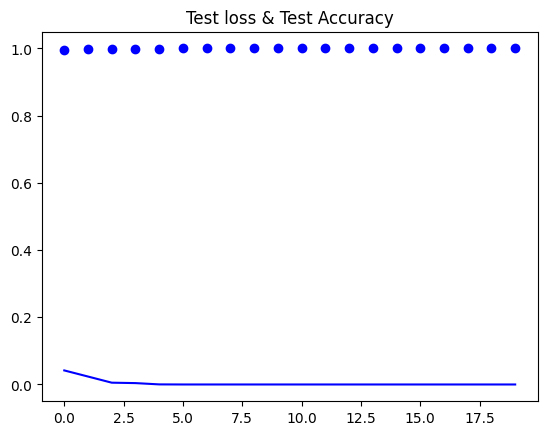

In [ ]:
# Vẽ đồ thị độ chính xác và  của tập test
import matplotlib.pyplot as plt
eval = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', eval[0])
print('Test accuracy;',eval[1])
accuracy = train.history['accuracy']
val_accuracy = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Test loss')
plt.plot(epochs,val_accuracy,'b',label= 'Test Accuracy')
plt.title('Test loss & Test Accuracy')

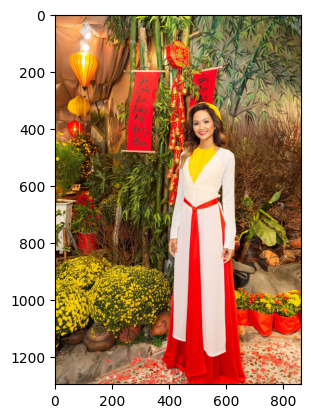

1/1 [==============================] - 0s 131ms/step
Hình ảnh là : Áo tứ thân


In [ ]:
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np

import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
# Tải một ảnh chưa train qua để kiểm tra độ chính xác của mô hình 
img1 = load_img('/content/drive/MyDrive/Colab Notebooks/Trandition_costume/Tese_image/TT.jpg')
plt.imshow(img1)
plt.show()
img = load_img('/content/drive/MyDrive/Colab Notebooks/Trandition_costume/Tese_image/TT.jpg',target_size=(64,64))
img= img_to_array(img)
img =img.reshape(1,64,64,3)
img = img.astype('float32')
img = img /255
Custom=np.argmax(model.predict(img),axis=-1)

if (Custom == 0) :
  print('Hình ảnh là : Áo dài')
if (Custom == 1) :
  print('Hình ảnh là : Áo tứ thân')
if (Custom == 2) :
  print('Hình ảnh là : Áo bà ba')

